In [75]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [76]:

MONTHS_DF = pd.read_csv(
    "C:/Users/admin/Masters-s-project/masters_project/machine_learning/data_analysis/air_pollution_smog_clear.csv",
)

In [77]:
MONTHS_DF.pop("entry_id")
MONTHS_DF.head()

,date,PM1,PM2.5,PM10,temp,pressure,humidity
0,2021-11-12T20:30:17,0.0,0.0,0.0,26.47,1022.04517,39.31152
1,2021-11-12T20:30:35,22.0,33.0,38.0,26.67,1022.39905,39.24609
2,2021-11-12T20:30:52,23.0,35.0,44.0,26.69,1022.33557,39.18848
3,2021-11-12T20:31:10,25.0,39.0,48.0,26.71,1022.28021,39.74805
4,2021-11-12T20:31:41,24.0,38.0,45.0,26.73,1022.37970,39.12109


In [78]:
def remove_df_outliers(df: pd.DataFrame = MONTHS_DF) -> pd.DataFrame:
    cols = ["PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]  # one or more

    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    df = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]

    return df


MONTHS_DF = remove_df_outliers()


In [79]:
MONTHS_DF.head()

,date,PM1,PM2.5,PM10,temp,pressure,humidity
78,2021-11-13T10:55:48,32.0,53.0,70.0,17.46,1019.50916,38.49121
79,2021-11-13T10:56:06,32.0,53.0,70.0,17.28,1019.61871,38.62598
80,2021-11-13T10:56:42,32.0,54.0,70.0,17.07,1019.53503,39.02637
85,2021-11-13T10:59:02,27.0,49.0,67.0,15.19,1019.56177,46.34473
86,2021-11-13T10:59:20,28.0,50.0,69.0,14.83,1019.60400,44.05762


In [97]:
import pandas as pd

df = pd.read_csv('jena_climate_2009_2016.csv')

time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
series = df['T (degC)'][5::6]
series.index = time[5::6]

In [98]:
import pandas as pd

df = pd.read_csv('jena_climate_2009_2016.csv')

time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
series = df['T (degC)'][5::6]
series.index = time[5::6]

In [99]:
import numpy as np

# function for generating the lagged matrix
def split_sequence(sequence, window_size):
    X = []
    y = []
    # for all indexes
    for i in range(len(sequence)):
        end_idx = i + window_size
        # exit condition
        if end_idx > len(sequence) - 1:
            break
        # get X and Y values
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


train = series[:-int(len(series)/10)]
test = series[-int(len(series)/10):]
X_train, y_train = split_sequence(train, window_size=24)

In [100]:
import statsmodels.api as sm

# train Ordinary Least Squares model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.376e+05
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:57:49   Log-Likelihood:                -70605.
No. Observations:               63058   AIC:                         1.413e+05
Df Residuals:                   63033   BIC:                         1.415e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0317      0.005      6.986      0.0

In [101]:
from scipy import stats

# get values of the residuals
residual = result.resid

# run tests and get the p values
print('p value of Jarque-Bera test is: ', stats.jarque_bera(residual)[1])
print('p value of Shapiro-Wilk test is: ', stats.shapiro(residual)[1])
print('p value of Kolmogorov-Smirnov test is: ', stats.kstest(residual, 'norm')[1])

p value of Jarque-Bera test is:  0.0
p value of Shapiro-Wilk test is:  0.0
p value of Kolmogorov-Smirnov test is:  0.0


c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning:

p-value may not be accurate for N > 5000.



In [102]:
import statsmodels.stats.api as sms

print('p value of Breusch–Pagan test is: ', sms.het_breuschpagan(result.resid, result.model.exog)[1])
print('p value of White test is: ', sms.het_white(result.resid, result.model.exog)[1])

p value of Breusch–Pagan test is:  2.996182722684507e-246
p value of White test is:  0.0


In [103]:
import statsmodels.api as sm

# train Ordinary Least Squares model
X_train = sm.add_constant(X_train)
model = sm.GLS(y_train, X_train)
result = model.fit()

print(result.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            GLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.376e+05
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:58:10   Log-Likelihood:                -70605.
No. Observations:               63058   AIC:                         1.413e+05
Df Residuals:                   63033   BIC:                         1.415e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0317      0.005      6.986      0.0

ValueError: Length of values (63058) does not match length of index (6985)

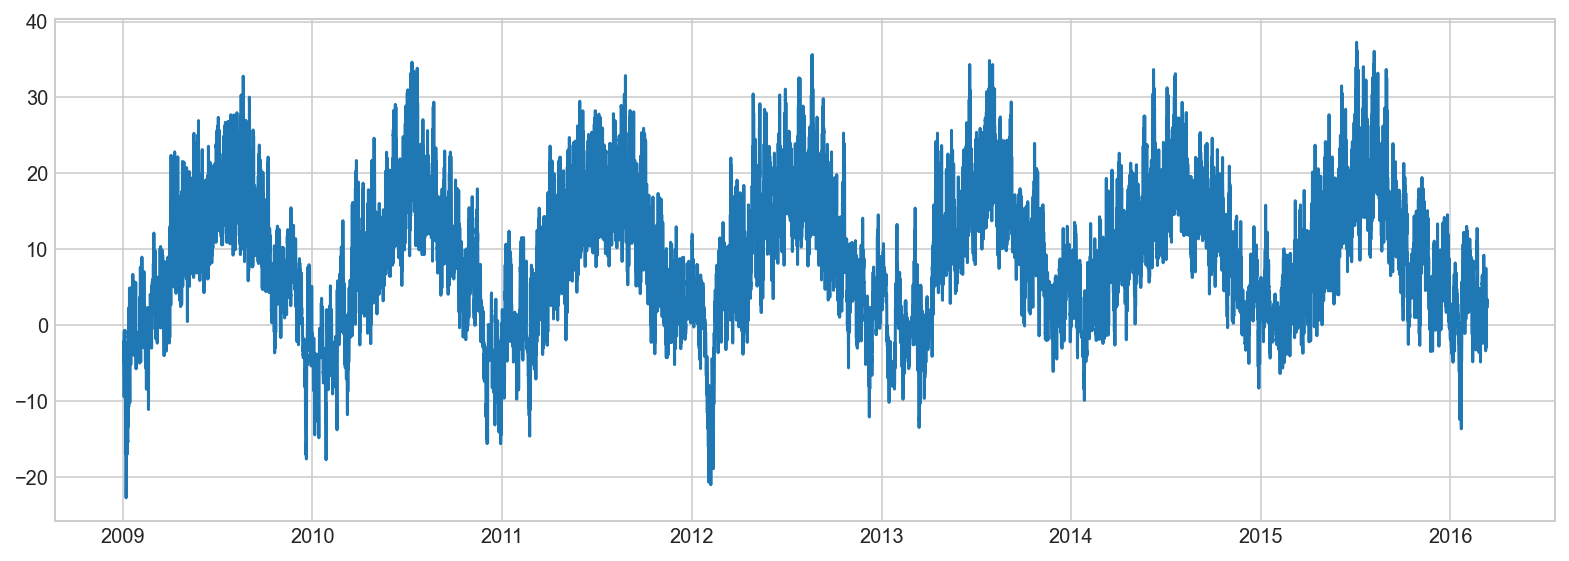

In [106]:
X_test = sm.add_constant(X_test)

y_train_preds = result.predict(X_train)
y_test_preds = result.predict(X_test)

from matplotlib import pyplot as plt

# indexes start from 24 due to the window size we chose
plt.plot(pd.Series(y_train, index=train[24:].index), label='train values')
plt.plot(pd.Series(y_test_preds, index=test[24:].index), label='test values')
plt.plot(pd.Series(y_train_preds, index=train[24:].index), label='train predictions')
plt.plot(pd.Series(y_test_preds, index=test[24:].index), label='test predictions')
plt.xlabel('Date time')
plt.ylabel('Temp (Celcius)')
plt.title('Forecasts')
plt.legend()
plt.show()